In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv('Height-Weight Data.csv')
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [30]:
df.shape

(3501, 2)

In [31]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [32]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


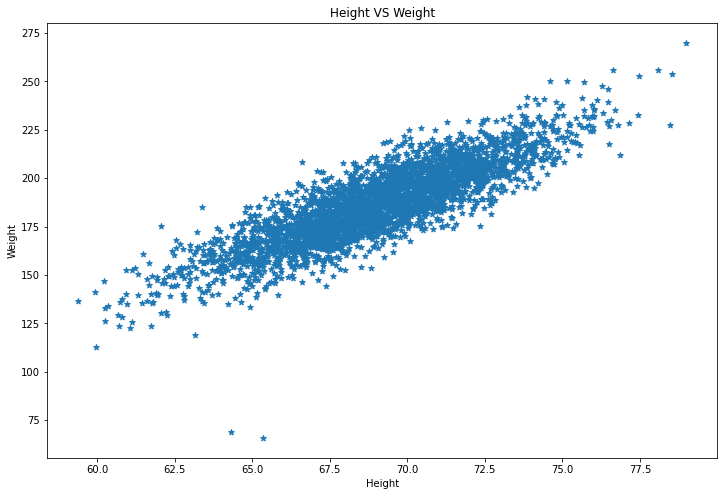

In [33]:
plt.figure(figsize=(12,8))
plt.xlabel("Height")
plt.ylabel('Weight')
plt.title("Height VS Weight")
plt.scatter(df.Height,df.Weight,marker='*')

In [59]:
x=df[['Height']].values
x

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [73.91254915],
       [67.39602078],
       [72.73897   ]])

In [58]:
y=df[['Weight']].values
y

array([[241.8935632],
       [162.3104725],
       [212.7408556],
       ...,
       [202.4299596],
       [144.2776711],
       [187.2229089]])

In [60]:
from sklearn.model_selection import train_test_split as tts

In [61]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3)
xtrain

array([[71.85748745],
       [70.54924202],
       [69.33966738],
       ...,
       [70.48223089],
       [65.04122113],
       [74.21643094]])

In [62]:
ytrain.shape

(2450, 1)

In [63]:
xtrain.shape

(2450, 1)

In [64]:
ytest.shape

(1051, 1)

In [65]:
xtest.shape

(1051, 1)

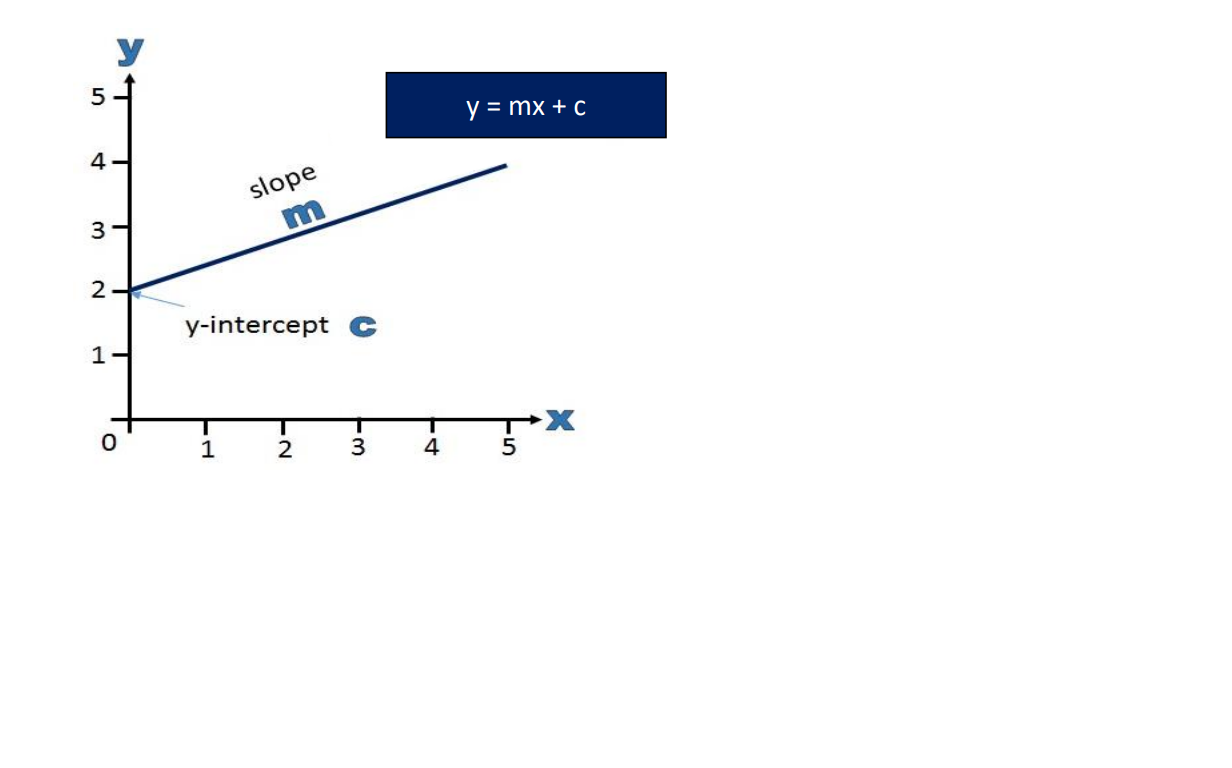

In [42]:
from IPython.display import Image
Image('linear_regression.png')

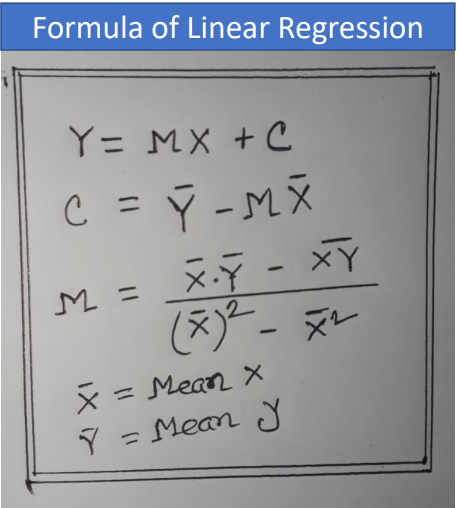

In [43]:
Image('formula.png')

# Model creation

In [66]:
xbar= np.mean(xtrain)
xbar

68.97702962506531

In [67]:
ybar=np.mean(ytrain)
ybar

186.55918144918365

In [72]:
xy=xtrain*ytrain
xybar=np.mean(xy)
xybar

12917.452948918904

In [78]:
x2=xtrain*xtrain
x2bar=np.mean(x2)
x2bar

4766.042265520123

In [79]:
m=np.abs((xbar*ybar-xybar)/(xbar*xbar-x2bar))
m

5.985979130556473

In [80]:
c=ybar-m*xbar
c

-226.3358783742329

In [81]:
def predict(x):
    y=m*x+c
    print(y)

In [84]:
predict(49)

66.97709902303427


In [86]:
pred=[]
for i in range(len(xtest)):
    y=m*xtest[i]+c
    pred.append(y)

In [87]:
pred

[array([195.57243655]),
 array([201.12740668]),
 array([179.08030885]),
 array([214.30392981]),
 array([161.684291]),
 array([203.25127602]),
 array([176.55987397]),
 array([178.71536076]),
 array([232.00619496]),
 array([177.67113166]),
 array([178.12706532]),
 array([162.53590739]),
 array([170.69374563]),
 array([181.23689335]),
 array([155.93804968]),
 array([215.71007288]),
 array([176.384022]),
 array([151.88007876]),
 array([187.4189722]),
 array([188.73584864]),
 array([211.14877319]),
 array([214.28669707]),
 array([192.96358737]),
 array([200.00726908]),
 array([201.39908148]),
 array([162.68147282]),
 array([192.73637451]),
 array([199.51139728]),
 array([172.782914]),
 array([204.54212177]),
 array([208.34819274]),
 array([185.18214224]),
 array([163.18246593]),
 array([195.87656834]),
 array([177.15356505]),
 array([185.85918515]),
 array([210.46270982]),
 array([186.03879224]),
 array([186.12167985]),
 array([192.90483032]),
 array([194.3443065]),
 array([191.55742664]),


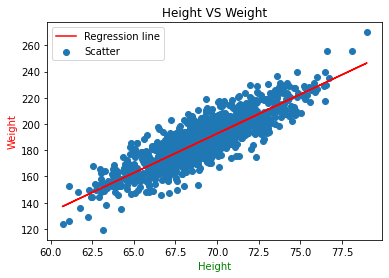

In [98]:
plt.title("Height VS Weight")
plt.xlabel('Height',color="Green")
plt.ylabel('Weight',color='red')
plt.scatter(xtest,ytest,label='Scatter')
plt.plot(xtest,pred,color='red',label='Regression line')
plt.legend()
plt.show()

In [102]:
ytestbar=np.mean(ytest)
a=0
for i in range(len(xtest)):
    a=a+(pred[i]-ytestbar)**2
a    

array([303286.82295119])

In [104]:
b=0
for i in range(len(xtest)):
    b=b+(ytest[i]-ytestbar)**2
    
b    

array([400910.77737739])

In [ ]:
R2_score=a/b    
R2_score